In [1]:
# Assigning features and label variables

from sklearn.naive_bayes import GaussianNB
model = GaussianNB() # 지도형  큰 데이터셋에 적합, 노이즈 데이터 셋 가능

from sklearn.svm import SVC
svm.SVC(kernel='linear') #적은 데이터 적합, 노이즈가 많은 데이터 적은 셋 적합.

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()



from sklearn.tree import DecisionTreeClassifier
scaler = StandardScaler()


In [338]:
# Import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns

# 라벨링
def encode_labels(*args, to_numpy=False):
    le = preprocessing.LabelEncoder()
    encoded_lists = [le.fit_transform(arg) for arg in args]
    
    if to_numpy:
        return [np.array(encoded) for encoded in encoded_lists]
    
    return encoded_lists
# 결측값 처리
class MissingValueHandler:
    def __init__(self, dataframe):
        self.df = dataframe

    def fill_missing(self, column_data, method):
        if method == 'mean':
            return column_data.fillna(column_data.mean())
        elif method == 'median':
            return column_data.fillna(column_data.median())
        elif method == 'mode':
            return column_data.fillna(column_data.mode()[0])
        elif method == 'zero':
            return column_data.fillna(0)
        else:
            raise ValueError("지원하지 않는 방법입니다. 'mean', 'median', 'mode', 또는 'zero' 중에서 선택하세요.")

    def drop(self):
        return self.df.dropna()

    def drop_loc(self):
        return self.df.dropna(axis=1)

    def get_dataframe(self):
        return self.df

    def summarize(self, preprocessing=False):
        #데이터프레임의 합계와 결측값 수를 출력하는 메서드
        if preprocessing:
            print("--- After Fill Missing ---")
            print("\nNumber of missing values in each column:")
        else:
            print("--- Before Fill Missing ---")
            print("Sum of each numeric column:")
        
        if not preprocessing:
            print(self.df.dtypes)
        
        print("\nNumber of missing values in each column:")
        print(self.df.isnull().sum())
        print("\n" + "-" * 30)

# 토큰나이져
class CategoricalEncoder:
    def __init__(self, dataframe):
        from sklearn import preprocessing
        self.df = dataframe

    def encode_labels(self):
        categorical_cols = self.df.select_dtypes(include=['object']).columns # 범주형 열 선택
        encoded_arrays = encode_labels(*[self.df[col] for col in categorical_cols], to_numpy=True) # 선택된 범주형 열을 인코딩하고 DataFrame으로 변환
        encoded_df = pd.DataFrame(encoded_arrays).T  # 인코딩된 결과를 DataFrame으로 결합, 전치하여 행과 열을 맞춤
        encoded_df.columns = categorical_cols # 인코딩된 열 이름 설정
        self.df.loc[:, categorical_cols] = encoded_df # .loc를 사용하여 원래 DataFrame에 인코딩된 열 대체

        return self.df
        
# X. y 분리
def split_features_and_target(encoded_df, target_column):
    df_X = encoded_df.drop(columns=[target_column])  # 타겟 열 제외
    df_y = encoded_df[target_column]  # 타겟 열 선택
    return df_X, df_y

# 0~1표준화
def scale_data(X_train, X_test):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)  # 훈련 데이터 스케일링
    X_test = scaler.transform(X_test)        # 테스트 데이터 스케일링
    return X_train, X_test

class MI:  # ModelInitializer
    def __init__(self, model_type='naive_bayes', **kwargs):
        self.model = self.initialize_model(model_type, **kwargs)
        if X_train is not None and y_train is not None:
            self.fit_model(X_train, y_train)

    def initialize_model(self, model_type, **kwargs):
        """모델 초기화 함수."""
        if model_type == 'GaussianNB':
            from sklearn.naive_bayes import GaussianNB
            model = GaussianNB(**kwargs)  # 노이즈 데이터셋에 적합
            print("Initialized GaussianNB model (suitable for larger datasets with noise).")
        elif model_type == 'SVM':
            from sklearn.svm import SVC
            model = SVC(**kwargs)  # 커널에 따라 SVM 모델 생성
        elif model_type == 'DecisionTreeClassifier':
            from sklearn.tree import DecisionTreeClassifier
            model = DecisionTreeClassifier(**kwargs)  # 의사 결정 나무
        elif model_type == 'RandomForestRegressor':
            from sklearn.ensemble import RandomForestRegressor
            model = RandomForestRegressor(**kwargs)  # 랜덤포레스트
        else:
            raise ValueError("Invalid model type. Choose 'naive_bayes' or 'SVM'.")
        
        return model
    def fit_model(self, X_train, y_train):
        """모델을 학습합니다."""
        self.model.fit(X_train, y_train)
        print("Model has been fitted.")
        
    def get_model(self):
        """초기화된 모델을 반환합니다."""
        return self.model


# naive_bayes_model = ML(model_type='naive_bayes').get_model()
# svm_model = ML(model_type='svm', kernel='linear').get_model()


def plot_decision_function(X_train, y_train, X_test, y_test, model):
    # 결정 경계 그리기
    import matplotlib.pyplot as plt
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    
    # 훈련 데이터 점 그리기
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, marker='o', label='Train')
    
    # 테스트 데이터 점 그리기
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=50, marker='x', label='Test')
    
    plt.title("Decision Function")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

#plot_decision_function(X_train, y_train, X_test, y_test, model)

In [339]:
# 데이터셋 로드
df = sns.load_dataset('titanic')
df_filter = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]

# 결측값 확인
MVS = MissingValueHandler(df_filter)
MVS.summarize(preprocessing=False)  # Before 상태

--- Before Fill Missing ---
Sum of each numeric column:
survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

Number of missing values in each column:
survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

------------------------------


In [340]:
# 결측값 처리
df_filter.loc[:, 'age'] = MVS.fill_missing(df_filter['age'], method='mean') 
df_filter.loc[:, 'embarked'] = MVS.fill_missing(df_filter['embarked'], method='mode')
MVS.summarize(preprocessing=True) # After 상태

--- After Fill Missing ---

Number of missing values in each column:

Number of missing values in each column:
survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

------------------------------


In [341]:
#라벨링
encoder = CategoricalEncoder(df_filter)
df_encoded = encoder.encode_labels()
df_encoded 

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [352]:
# 학습 분리
df_X, df_y = split_features_and_target(df_encoded, 'survived')  # 특징과 타겟 분리
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=109)

# 스케일화
X_train, X_test = scale_data(X_train, X_test)

# 모델 선택 및 피팅
#model = MI(model_type='GaussianNB').get_model()
#model = MI(model_type='SVM', kernel='linear', C=1, gamma=0.01).get_model()
#model = MI(model_type='DecisionTreeClassifier', random_state=0, max_depth=4).get_model() # 중요도 사용 가능
model = MI(model_type='RandomForestRegressor', n_estimators=100, random_state=42).get_model() # 중요도 사용 가능


from sklearn.metrics import accuracy_score, classification_report
#y_pred = model.predict(X_test)

print("훈련 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))
#print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
#print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Model has been fitted.
훈련 세트 정확도: 0.881
테스트 세트 정확도: 0.340


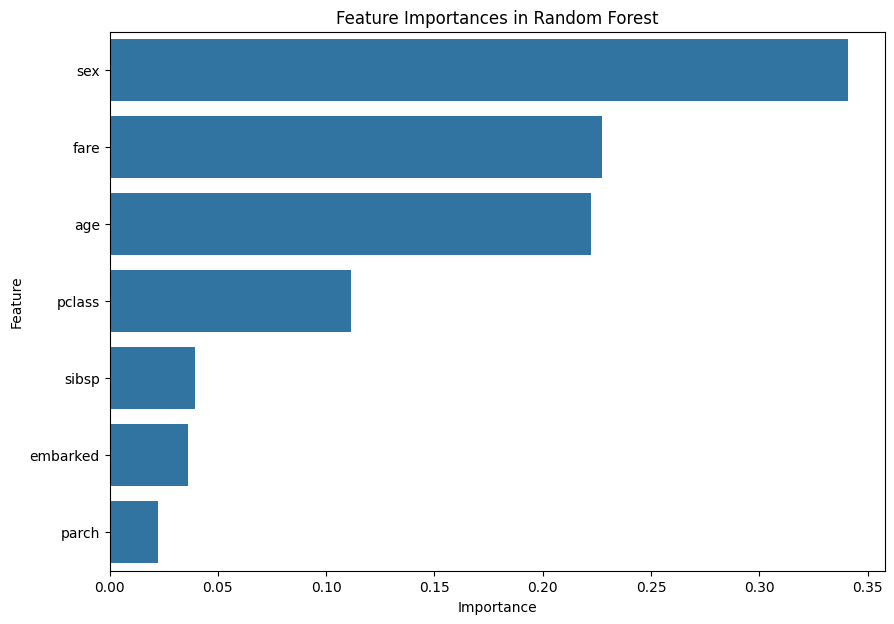

In [353]:
import matplotlib.pyplot as plt
import seaborn as sns

# 특성 중요도 추출
feature_importances = model.feature_importances_

# 특성 중요도를 데이터프레임으로 변환
feature_importances_df = pd.DataFrame({
    'Feature': df_X.columns,
    'Importance': feature_importances
})

# 중요도 순으로 정렬
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances in Random Forest')
plt.show()